In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Brick and Mortar SA

In [2]:
#first csv file scraped
df = pd.read_csv('bricknmortar.csv', sep='\t')

In [3]:
#second csv file scraped with bricknmortar tag
results=pd.read_csv('/Users/BrickNMortar_vs_Ecommerce/bricknmortar2020-2015.csv', sep='\t')

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#getting the results up to 2015
results=results[:-5860]  

In [5]:
#getting teh english tweets
df=df[df.language=='en']

In [6]:
#getting the english tweets
results=results[results.language=='en']

In [7]:
#concatenating the two frames together
bnm= pd.concat([df,results], axis=0)

In [88]:
bnm

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1364184494333456387,1364184494333456387,2021-02-23 07:05:03 EST,2021-02-23,07:05:03,-500,3068690196,divergentcio,Brian E. Thomas,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1364108351475511296,1364108351475511296,2021-02-23 02:02:29 EST,2021-02-23,02:02:29,-500,1309780593450856448,dondonwoodyard,Jonathan Woodyard,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1364077572779372547,1364077572779372547,2021-02-23 00:00:11 EST,2021-02-23,00:00:11,-500,76726886,entrepreneurind,@EntrepreneurInd,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1363975633932603397,1363975633932603397,2021-02-22 17:15:07 EST,2021-02-22,17:15:07,-500,873235195847032834,tryraydiant,Raydiant - Experience Platform,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1363891846598909957,1363891846598909957,2021-02-22 11:42:10 EST,2021-02-22,11:42:10,-500,234599955,malka_diamonds,Malka Diamonds,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31748,550438672966090753,550438672966090753,2014-12-31 18:49:40 EST,2014-12-31,18:49:40,-500,79308403,dennisvera,Dennis Vera,"{'type': 'Point', 'coordinates': [40.827247, -...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
31749,550349917118808065,550349917118808065,2014-12-31 12:56:59 EST,2014-12-31,12:56:59,-500,2307095323,botlnjchapter,BOTLNJCHAPTER,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
31750,550214946525831169,550214946525831169,2014-12-31 04:00:40 EST,2014-12-31,04:00:40,-500,24892768,tarinimk,Tarini MathurKaul,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
31751,550183526231191552,550183526231191552,2014-12-31 01:55:49 EST,2014-12-31,01:55:49,-500,1417590276,formfoundation,The Form Foundation.,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [89]:
#tokenization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets= [tokenizer.tokenize(x) for x in bnm.tweet]

In [11]:
#tokenized tweets
tokenized_tweets

[['What',
  'Enterprise',
  'Decision',
  'Makers',
  'Need',
  'to',
  'Know',
  'about',
  'the',
  'Workplace',
  'of',
  'the',
  'Future',
  'https',
  't',
  'co',
  'jdZLCgwiXk',
  'FutureOfWork',
  'Workplace',
  'Innovation',
  'DigitalStrategy',
  'RealEstate',
  'BrickAndMortar',
  'OfficeSpace',
  'BusinessTransformation',
  'Coruzant',
  'CTO',
  'Creston',
  'Crestron'],
 ['Our',
  'oldest',
  'kid',
  'is',
  'back',
  'in',
  'regular',
  'brickandmortar',
  'school',
  'today'],
 ['The',
  'lockdown',
  'has',
  'engendered',
  'a',
  'culture',
  'that',
  'has',
  'made',
  'people',
  'less',
  'wary',
  'of',
  'onlineshopping',
  'quite',
  'to',
  'the',
  'point',
  'of',
  'near',
  'replacement',
  'of',
  'the',
  'brickandmortar',
  'purchase',
  'pandemic',
  'FMCG',
  'startups',
  'https',
  't',
  'co',
  'WKDGDh',
  'Wi'],
 ['Word',
  'spreads',
  'like',
  'wildfire',
  'This',
  'means',
  'you',
  'could',
  'undermine',
  'your',
  'business',
  'if

In [18]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', 'e', 'o', 'u']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 'brickandmortar', 'brickandmortar ',
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', '@brickandmortar', '#brickandmortar']
sw_set = set(sw_list)

In [13]:
#filtering for stop words
filtered_tweets=[]
for i in range(len(tokenized_tweets)):
    for word in tokenized_tweets[i]:
        if word not in sw_set:
            filtered_tweets.append(word)

In [14]:
#lower casing all the tokens
filtered_tweets=[x.lower() for x in filtered_tweets]

In [15]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets=[]
for w in filtered_tweets:
    lemmatized_tweets.append(lemmatizer.lemmatize(w))

In [16]:
#word frequency table with graph to follow
word_freq= pd.DataFrame(lemmatized_tweets)
word_freq[0].value_counts().head(50)

co                114756
retail             48061
store              26715
brickandmortar     22633
ecommerce          12115
retailer           11051
i                  10374
amp                10191
business            9526
new                 9254
brick               9141
online              9093
the                 8823
mortar              8282
via                 8184
cre                 7560
amazon              7115
http                6699
u                   5696
shopping            5599
sale                5379
customer            5216
retailnews          5036
experience          4786
a                   4725
open                4697
shop                4427
digital             4100
how                 3827
we                  3790
brand               3769
marketing           3656
get                 3559
w                   3547
it                  3514
time                3402
see                 3319
consumer            3245
b                   3229
colorado            3206


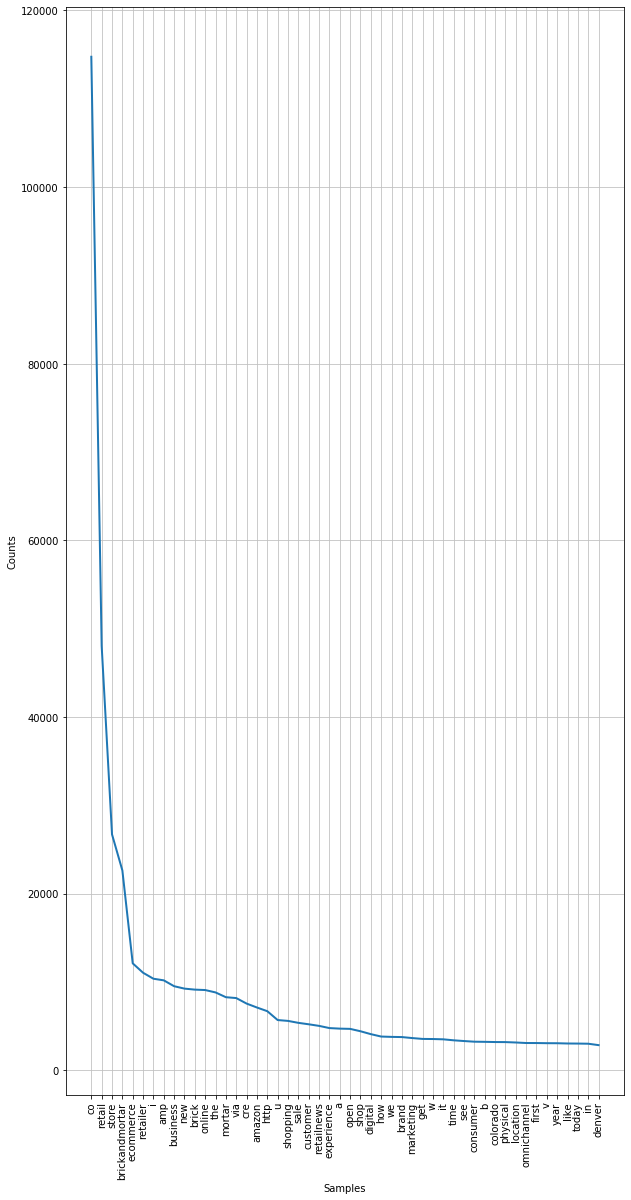

In [17]:
fdist=FreqDist(lemmatized_tweets)
plt.figure(figsize=(10,20))
fdist.plot(50)

In [20]:
#importing the vader sentiment analysis package and instantiating it
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [21]:
#list comprehension to get scores from tweets using my written function
a= [analyser.polarity_scores(x) for x in bnm['tweet']]

In [22]:
#pulling the relevant score into a list 
b= [x.items() for x in a]

In [23]:
#creating a dataframe of my vader scores of the tweets
data1=pd.DataFrame(b, columns= ['neg', 'neu', 'pos', 'comp'])

In [24]:
#putting my scores into a column in the dataframe
b = data1['comp']

In [25]:
#making a column that grabs the right compound score to gauge sentiment
data1['comp2']= [score[1] for score in b]

In [26]:
#rounding out my vader score
data1['comp2']= data1['comp2'].round(3)

In [27]:
#converting the vader scores into something easier to manipulate so that I can generate three distinct classes
col         = 'comp2'
conditions  = [ data1[col] >= .150, (data1[col] < .150) & (data1[col]> -.150), data1[col] <= -.150 ]
choices     = [ 1, 0, -1 ]
data1["comp3"] = np.select(conditions, choices, default=np.nan)

In [28]:
#giving the mapped numbers categories
data1['comp4']= data1['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [31]:
data1

,neg,neu,pos,comp,comp2,comp3,comp4
0,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
1,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
3,"(neg, 0.147)","(neu, 0.696)","(pos, 0.157)","(compound, 0.1027)",0.103,0.0,neutral
4,"(neg, 0.049)","(neu, 0.951)","(pos, 0.0)","(compound, -0.126)",-0.126,0.0,neutral
...,...,...,...,...,...,...,...
112208,"(neg, 0.0)","(neu, 0.715)","(pos, 0.285)","(compound, 0.6114)",0.611,1.0,positive
112209,"(neg, 0.0)","(neu, 0.715)","(pos, 0.285)","(compound, 0.6114)",0.611,1.0,positive
112210,"(neg, 0.112)","(neu, 0.748)","(pos, 0.14)","(compound, 0.1531)",0.153,1.0,positive
112211,"(neg, 0.0)","(neu, 0.714)","(pos, 0.286)","(compound, 0.6808)",0.681,1.0,positive


In [48]:
dfbnm=pd.DataFrame(bnm.tweet)

In [91]:
bnm2=pd.concat([bnm[['date','tweet']].reset_index(), data1.reset_index()], axis=1)

In [93]:
bnm2.isna().sum()

index    0
date     0
tweet    0
index    0
neg      0
neu      0
pos      0
comp     0
comp2    0
comp3    0
comp4    0
dtype: int64

In [94]:
#finding all the positive tweets for bricknmortar
bnm2[bnm2.comp4=='positive'].isna().sum()

index    0
date     0
tweet    0
index    0
neg      0
neu      0
pos      0
comp     0
comp2    0
comp3    0
comp4    0
dtype: int64

In [95]:
#finding all the negative tweets for bricknmortar
bnm2[bnm2.comp4=='negative'].isna().sum()

index    0
date     0
tweet    0
index    0
neg      0
neu      0
pos      0
comp     0
comp2    0
comp3    0
comp4    0
dtype: int64

In [96]:
#finding the neutral tweets with bricknmortar
bnm2[bnm2.comp4=='neutral'].isna().sum()

index    0
date     0
tweet    0
index    0
neg      0
neu      0
pos      0
comp     0
comp2    0
comp3    0
comp4    0
dtype: int64

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2015-2021')

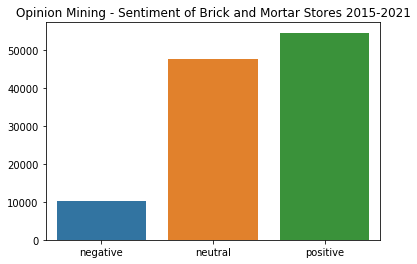

In [246]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[ bnm1[bnm1.comp4=='negative'].shape[0],
        bnm1[bnm1.comp4=='neutral'].shape[0], bnm1[bnm1.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2015-2021')

In [ ]:
# I Would like to conduct word freq of pos, neg, neu on brick n mortar. ALso 
# pos, neg, neu across the years 2015-2021


In [168]:
bnm2[bnm2.date>='2020-01-01']

,index,date,tweet,index,neg,neu,pos,comp,comp2,comp3,comp4
0,0,2021-02-23,What Enterprise Decision-Makers Need to Know a...,0,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
1,1,2021-02-23,Our oldest kid is back in regular #brickandmor...,1,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
2,2,2021-02-23,The #lockdown has engendered a culture that ha...,2,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
3,3,2021-02-22,Word spreads like wildfire. This means you cou...,3,"(neg, 0.147)","(neu, 0.696)","(pos, 0.157)","(compound, 0.1027)",0.103,0.0,neutral
4,4,2021-02-22,A little geometric bezel to a classic ring wil...,4,"(neg, 0.049)","(neu, 0.951)","(pos, 0.0)","(compound, -0.126)",-0.126,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...
86808,4494,2020-01-01,"Happy New Year! It’s 2020, Retailers! Surrende...",86808,"(neg, 0.0)","(neu, 0.68)","(pos, 0.32)","(compound, 0.8395)",0.840,1.0,positive
86809,4495,2020-01-01,All of us here at Signa are wishing you a happ...,86809,"(neg, 0.0)","(neu, 0.569)","(pos, 0.431)","(compound, 0.9245)",0.924,1.0,positive
86810,4496,2020-01-01,[In 202 (now)] Choose 2 co-create a coalition ...,86810,"(neg, 0.05)","(neu, 0.95)","(pos, 0.0)","(compound, -0.25)",-0.250,-1.0,negative
86811,4497,2020-01-01,Kid-Focused Experiential Retail - Camp is a Hi...,86811,"(neg, 0.0)","(neu, 0.784)","(pos, 0.216)","(compound, 0.6997)",0.700,1.0,positive


In [208]:
dataset=bnm2[bnm2.date>='2015-01-01']

In [209]:
datasetone=dataset[dataset.date<='2015-12-31']

In [212]:
datasetone
import pickle
with open('2015bnm', 'wb') as f:
    pickle.dump(datasetone, f, pickle.HIGHEST_PROTOCOL)


In [215]:
dataset=bnm2[bnm2.date>='2016-01-01']

In [216]:
datasettwo=dataset[dataset.date<='2016-12-31']

In [217]:
datasettwo
import pickle
with open('2016bnm', 'wb') as f:
    pickle.dump(datasettwo, f, pickle.HIGHEST_PROTOCOL)

In [221]:
dataset=bnm2[bnm2.date>='2017-01-01']

In [222]:
datasetthree=dataset[dataset.date<='2017-12-31']

In [223]:
datasetthree
import pickle
with open('2017bnm', 'wb') as f:
    pickle.dump(datasetthree, f, pickle.HIGHEST_PROTOCOL)

In [225]:
dataset=bnm2[bnm2.date>='2018-01-01']

In [226]:
datasetfour=dataset[dataset.date<='2018-12-31']

In [227]:
datasetfour
import pickle
with open('2018bnm', 'wb') as f:
    pickle.dump(datasetfour, f, pickle.HIGHEST_PROTOCOL)

In [228]:
dataset=bnm2[bnm2.date>='2019-01-01']

In [229]:
datasetfive=dataset[dataset.date<='2019-12-31']

In [230]:
datasetfive
import pickle
with open('2019bnm', 'wb') as f:
    pickle.dump(datasetfive, f, pickle.HIGHEST_PROTOCOL)

In [231]:
dataset=bnm2[bnm2.date>='2020-01-01']

In [232]:
dataset
import pickle
with open('2020-21bnm', 'wb') as f:
    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)

In [213]:
with open ('2015bnm', 'rb') as f:
    datasetone=pickle.load(f)

In [234]:
datasetone[datasetone.comp4=='positive']

,index,date,tweet,index,neg,neu,pos,comp,comp2,comp3,comp4
42988,46931,2015-12-31,Happy New Year from Thailand! We love you all ...,42988,"(neg, 0.0)","(neu, 0.565)","(pos, 0.435)","(compound, 0.9611)",0.961,1.0,positive
42989,46932,2015-12-31,Do you wish your favourite #brickandmortar clo...,42989,"(neg, 0.0)","(neu, 0.74)","(pos, 0.26)","(compound, 0.7171)",0.717,1.0,positive
42990,46933,2015-12-31,A new favorite: Train by @brickandmortar http...,42990,"(neg, 0.0)","(neu, 0.727)","(pos, 0.273)","(compound, 0.4588)",0.459,1.0,positive
42993,46936,2015-12-31,"This is the last #tbt of 2015, I give you youn...",42993,"(neg, 0.0)","(neu, 0.743)","(pos, 0.257)","(compound, 0.8232)",0.823,1.0,positive
42994,46937,2015-12-31,Building a better Brick-and-Mortar with the Bi...,42994,"(neg, 0.0)","(neu, 0.805)","(pos, 0.195)","(compound, 0.4404)",0.440,1.0,positive
...,...,...,...,...,...,...,...,...,...,...,...
112200,31738,2015-01-03,We are off to @ACajunLife #FoodCart to film a ...,112200,"(neg, 0.0)","(neu, 0.87)","(pos, 0.13)","(compound, 0.4019)",0.402,1.0,positive
112201,31739,2015-01-03,.@ACajunLife - excited to be helping you today...,112201,"(neg, 0.0)","(neu, 0.45)","(pos, 0.55)","(compound, 0.944)",0.944,1.0,positive
112202,31740,2015-01-03,What #BrickAndMortar Can Learn From #Amazon ’s...,112202,"(neg, 0.0)","(neu, 0.855)","(pos, 0.145)","(compound, 0.1779)",0.178,1.0,positive
112203,31741,2015-01-02,So much to do but so excited to do it! Openin...,112203,"(neg, 0.0)","(neu, 0.781)","(pos, 0.219)","(compound, 0.7228)",0.723,1.0,positive


In [235]:
datasetone[datasetone.comp4=='neutral']

,index,date,tweet,index,neg,neu,pos,comp,comp2,comp3,comp4
42991,46934,2015-12-31,@xbloodIines word,42991,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
42992,46935,2015-12-31,Forecast: Consumers will shop in #brickandmort...,42992,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
42995,46938,2015-12-31,These #BrickandMortar Stores Are #Amazon-Proof...,42995,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
42997,46940,2015-12-30,"""Blogging isn't overrated!"" - Even for #bricka...",42997,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
42998,46941,2015-12-30,@brickandmortar u ever listen to @whywithaqmark ?,42998,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...
112189,31725,2015-01-05,See how your #brickandmortar store can evolve ...,112189,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
112195,31731,2015-01-04,#socialselling 🌀 @cellinip #Brickandmortar ret...,112195,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
112198,31736,2015-01-03,Making #FoodCart Magic happen! @ACajunLife is ...,112198,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral
112204,31742,2015-01-02,Way to go @BurrascaPDX --Most Anticipated #Por...,112204,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.0,0.0,neutral


In [236]:
datasetone[datasetone.comp4=='negative']

,index,date,tweet,index,neg,neu,pos,comp,comp2,comp3,comp4
43010,46954,2015-12-29,@librarysteg Album... Trying by @Bully EP... ...,43010,"(neg, 0.245)","(neu, 0.755)","(pos, 0.0)","(compound, -0.6369)",-0.637,-1.0,negative
43014,46958,2015-12-29,#Macy’s CEO Lundgren: #BrickAndMortar vs. onli...,43014,"(neg, 0.167)","(neu, 0.833)","(pos, 0.0)","(compound, -0.3818)",-0.382,-1.0,negative
43020,46964,2015-12-29,Losing another #bookstore-- Barnes &amp; Noble...,43020,"(neg, 0.298)","(neu, 0.702)","(pos, 0.0)","(compound, -0.6249)",-0.625,-1.0,negative
43041,46990,2015-12-27,"Growing up I listened to Bob Marley, Soul For ...",43041,"(neg, 0.137)","(neu, 0.798)","(pos, 0.065)","(compound, -0.4404)",-0.440,-1.0,negative
43064,47014,2015-12-24,Bad News for #BrickandMortar #Retailers in 201...,43064,"(neg, 0.304)","(neu, 0.696)","(pos, 0.0)","(compound, -0.5423)",-0.542,-1.0,negative
...,...,...,...,...,...,...,...,...,...,...,...
112150,31679,2015-01-13,@Jrichelson Is @LeanRetail dead? Is anyone els...,112150,"(neg, 0.298)","(neu, 0.702)","(pos, 0.0)","(compound, -0.6868)",-0.687,-1.0,negative
112160,31692,2015-01-11,What's not to love? #BrickandMortar #Brunch h...,112160,"(neg, 0.36)","(neu, 0.64)","(pos, 0.0)","(compound, -0.5216)",-0.522,-1.0,negative
112174,31708,2015-01-09,#Ecommerce has limited impact on HK #brickandm...,112174,"(neg, 0.174)","(neu, 0.826)","(pos, 0.0)","(compound, -0.2263)",-0.226,-1.0,negative
112187,31723,2015-01-05,Stop out and say hi this Saturday from 10-6 at...,112187,"(neg, 0.115)","(neu, 0.885)","(pos, 0.0)","(compound, -0.296)",-0.296,-1.0,negative


Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2015')

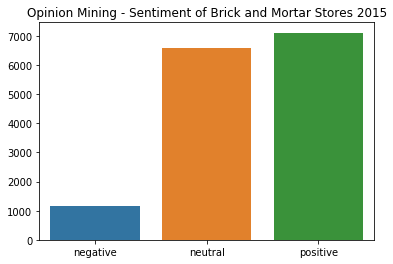

In [237]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetone[datasetone.comp4=='negative'].shape[0], 
            datasetone[datasetone.comp4=='neutral'].shape[0], datasetone[datasetone.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2015')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2016')

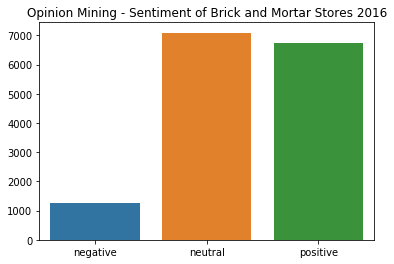

In [240]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasettwo[datasettwo.comp4=='negative'].shape[0], 
            datasettwo[datasettwo.comp4=='neutral'].shape[0], datasettwo[datasettwo.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2016')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2017')

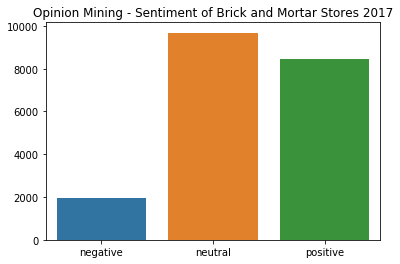

In [242]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetthree[datasetthree.comp4=='negative'].shape[0], 
            datasetthree[datasetthree.comp4=='neutral'].shape[0], datasetthree[datasetthree.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2017')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2018')

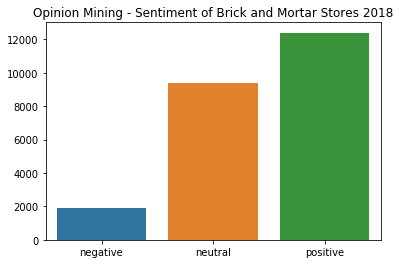

In [243]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetfour[datasetfour.comp4=='negative'].shape[0], 
            datasetfour[datasetfour.comp4=='neutral'].shape[0], datasetfour[datasetfour.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2018')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2019')

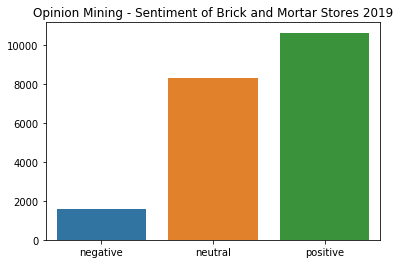

In [244]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[datasetfive[datasetfive.comp4=='negative'].shape[0], 
            datasetfive[datasetfive.comp4=='neutral'].shape[0], datasetfive[datasetfive.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2019')

Text(0.5, 1.0, 'Opinion Mining - Sentiment of Brick and Mortar Stores 2020-21')

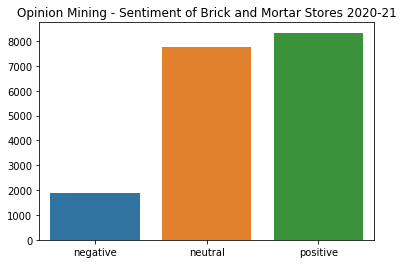

In [245]:
import seaborn as sns
sns.barplot(x=['negative', 'neutral', 'positive'], y=[dataset[dataset.comp4=='negative'].shape[0], 
            dataset[dataset.comp4=='neutral'].shape[0], dataset[dataset.comp4=='positive'].shape[0]])
plt.title('Opinion Mining - Sentiment of Brick and Mortar Stores 2020-21')

In [219]:
with open ('2016bnm', 'rb') as f:
    datasettwo= pickle.load(f)

In [220]:
datasettwo

,index,date,tweet,index,neg,neu,pos,comp,comp2,comp3,comp4
35136,38365,2016-12-31,▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 🌟🌟 #RKC's #Top500 🌟🌟 🔊 @bricka...,35136,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
35137,38366,2016-12-31,▬▬▬▬▬▬▬▬▬▬▬▬▬▬ 🌟🌟 #RKC's #Top500 🌟🌟 🔊 @bricka...,35137,"(neg, 0.0)","(neu, 0.906)","(pos, 0.094)","(compound, 0.3818)",0.382,1.0,positive
35138,38367,2016-12-31,I'd presume these r #retail orgs that tried 2 ...,35138,"(neg, 0.091)","(neu, 0.909)","(pos, 0.0)","(compound, -0.2732)",-0.273,-1.0,negative
35139,38368,2016-12-31,The latest Retail Analytica! https://t.co/Lqx...,35139,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
35140,38369,2016-12-31,#winterwhite sale going on now at our #brickan...,35140,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...
109459,28676,2016-01-02,An Overview of Our Wine and Liquor Store http...,109459,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
109460,28677,2016-01-01,Goodbye Empire Vintage Clothing. Hello Mrs. Bo...,109460,"(neg, 0.0)","(neu, 1.0)","(pos, 0.0)","(compound, 0.0)",0.000,0.0,neutral
109461,28678,2016-01-01,#BrickAndMortar Isn’t Dead Yet-Converting In-S...,109461,"(neg, 0.281)","(neu, 0.719)","(pos, 0.0)","(compound, -0.6486)",-0.649,-1.0,negative
109462,28679,2016-01-01,Happy New Year. Now to crochet all the things...,109462,"(neg, 0.0)","(neu, 0.829)","(pos, 0.171)","(compound, 0.5719)",0.572,1.0,positive
